http://pandas.pydata.org/pandas-docs/stable/10min.html

# 10 Minutes to pandas

This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the [Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook) 

Customarily, we import as follows:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Object Creation

See the [Data Structure Intro section](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro) 

Creating a Series by passing a list of values, letting pandas create a default integer index:

In [3]:
s = pd.Series([1,3,5,np.nan,6,8])

In [4]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [5]:
dates = pd.date_range('20130101', periods=6)

In [6]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [7]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [8]:
df

,A,B,C,D
2013-01-01,1.571507,0.160021,-0.015071,-0.118588
2013-01-02,-1.037697,-0.891196,0.495447,0.453095
2013-01-03,-1.682384,-0.026006,-0.152957,-0.212614
2013-01-04,-0.108757,-0.958267,0.407331,0.187037
2013-01-05,1.092380,2.841777,-0.125714,-0.760722
2013-01-06,1.638509,-0.601126,-1.043931,-1.330950


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [9]:
df2 = pd.DataFrame({'A':1.,
                   'B':pd.Timestamp('20130102'),
                   'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                   'D':np.array([3]*4,dtype='int32'),
                   'E':pd.Categorical(["test","train","test","train"]),
                   'F':'foo'})

In [10]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Having specific [dtypes](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes)

In [11]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

In [12]:
# df2.<TAB>

As you can see, the columns A, B, C, and D are automatically tab completed. E is there as well; the rest of the attributes have been truncated for brevity.

## Viewing Data

See the [Basics section](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics) 

See the top & bottom rows of the frame

In [13]:
df.head()

,A,B,C,D
2013-01-01,1.571507,0.160021,-0.015071,-0.118588
2013-01-02,-1.037697,-0.891196,0.495447,0.453095
2013-01-03,-1.682384,-0.026006,-0.152957,-0.212614
2013-01-04,-0.108757,-0.958267,0.407331,0.187037
2013-01-05,1.092380,2.841777,-0.125714,-0.760722


In [14]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.108757,-0.958267,0.407331,0.187037
2013-01-05,1.092380,2.841777,-0.125714,-0.760722
2013-01-06,1.638509,-0.601126,-1.043931,-1.330950


Display the index, columns, and the underlying numpy data

In [15]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
df.columns

Index([u'A', u'B', u'C', u'D'], dtype='object')

In [17]:
df.values

array([[ 1.57150668,  0.16002149, -0.01507058, -0.11858772],
       [-1.03769719, -0.89119559,  0.49544709,  0.45309462],
       [-1.68238391, -0.02600566, -0.15295699, -0.21261369],
       [-0.10875693, -0.9582675 ,  0.40733062,  0.18703669],
       [ 1.09238026,  2.84177746, -0.12571427, -0.76072186],
       [ 1.63850927, -0.60112596, -1.04393119, -1.33095031]])

Describe shows a quick statistic summary of your data

In [18]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.245593,0.087534,-0.072483,-0.297124
std,1.407466,1.423367,0.549378,0.651149
min,-1.682384,-0.958267,-1.043931,-1.330950
25%,-0.805462,-0.818678,-0.146146,-0.623695
50%,0.491812,-0.313566,-0.070392,-0.165601
75%,1.451725,0.113515,0.301730,0.110631
max,1.638509,2.841777,0.495447,0.453095


Transposing your data

In [19]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,1.571507,-1.037697,-1.682384,-0.108757,1.092380,1.638509
B,0.160021,-0.891196,-0.026006,-0.958267,2.841777,-0.601126
C,-0.015071,0.495447,-0.152957,0.407331,-0.125714,-1.043931
D,-0.118588,0.453095,-0.212614,0.187037,-0.760722,-1.330950


Sorting by an axis

In [20]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.118588,-0.015071,0.160021,1.571507
2013-01-02,0.453095,0.495447,-0.891196,-1.037697
2013-01-03,-0.212614,-0.152957,-0.026006,-1.682384
2013-01-04,0.187037,0.407331,-0.958267,-0.108757
2013-01-05,-0.760722,-0.125714,2.841777,1.092380
2013-01-06,-1.330950,-1.043931,-0.601126,1.638509


Sorting by value

In [21]:
df.sort_values(by='B')

,A,B,C,D
2013-01-04,-0.108757,-0.958267,0.407331,0.187037
2013-01-02,-1.037697,-0.891196,0.495447,0.453095
2013-01-06,1.638509,-0.601126,-1.043931,-1.330950
2013-01-03,-1.682384,-0.026006,-0.152957,-0.212614
2013-01-01,1.571507,0.160021,-0.015071,-0.118588
2013-01-05,1.092380,2.841777,-0.125714,-0.760722


## Selection

**Note:** While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc, .iloc and .ix.

See the indexing documentation [Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and [MultiIndex / Advanced Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

### Getting

Selecting a single column, which yields a Series, equivalent to df.A

In [22]:
df['A']

2013-01-01    1.571507
2013-01-02   -1.037697
2013-01-03   -1.682384
2013-01-04   -0.108757
2013-01-05    1.092380
2013-01-06    1.638509
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [23]:
df[0:3]

,A,B,C,D
2013-01-01,1.571507,0.160021,-0.015071,-0.118588
2013-01-02,-1.037697,-0.891196,0.495447,0.453095
2013-01-03,-1.682384,-0.026006,-0.152957,-0.212614


In [24]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-1.037697,-0.891196,0.495447,0.453095
2013-01-03,-1.682384,-0.026006,-0.152957,-0.212614
2013-01-04,-0.108757,-0.958267,0.407331,0.187037


### Selection by Label

See more in [Selection by Label](Selection by Label)

For getting a cross section using a label

In [25]:
df.loc[dates[0]]

A    1.571507
B    0.160021
C   -0.015071
D   -0.118588
Name: 2013-01-01 00:00:00, dtype: float64

Selection by Label

In [26]:
df.loc[:,['A','B']]

,A,B
2013-01-01,1.571507,0.160021
2013-01-02,-1.037697,-0.891196
2013-01-03,-1.682384,-0.026006
2013-01-04,-0.108757,-0.958267
2013-01-05,1.092380,2.841777
2013-01-06,1.638509,-0.601126


Showing label slicing, both endpoints are included

In [27]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-1.037697,-0.891196
2013-01-03,-1.682384,-0.026006
2013-01-04,-0.108757,-0.958267


Reduction in the dimensions of the returned object

In [28]:
df.loc['20130102',['A','B']]

A   -1.037697
B   -0.891196
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value

In [29]:
df.loc[dates[0],'A']

1.571506676720408

### Selection by Position

See more in [Selection by Position](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer)

Select via the position of the passed integers

In [30]:
df.iloc[3]

A   -0.108757
B   -0.958267
C    0.407331
D    0.187037
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

In [31]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.108757,-0.958267
2013-01-05,1.092380,2.841777


By lists of integer position locations, similar to the numpy/python style

In [32]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-1.037697,0.495447
2013-01-03,-1.682384,-0.152957
2013-01-05,1.092380,-0.125714


For slicing rows explicitly

In [33]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-1.037697,-0.891196,0.495447,0.453095
2013-01-03,-1.682384,-0.026006,-0.152957,-0.212614


For slicing columns explicitly

In [34]:
df.iloc[:,1:3]

,B,C
2013-01-01,0.160021,-0.015071
2013-01-02,-0.891196,0.495447
2013-01-03,-0.026006,-0.152957
2013-01-04,-0.958267,0.407331
2013-01-05,2.841777,-0.125714
2013-01-06,-0.601126,-1.043931


For getting a value explicitly

In [35]:
df.iloc[1,1]

-0.89119558600132898

For getting fast access to a scalar (equiv to the prior method)

In [36]:
df.iat[1,1]

-0.89119558600132898

## Boolean Indexing

Using a single column’s values to select data.

In [37]:
df[df.A > 0]

,A,B,C,D
2013-01-01,1.571507,0.160021,-0.015071,-0.118588
2013-01-05,1.092380,2.841777,-0.125714,-0.760722
2013-01-06,1.638509,-0.601126,-1.043931,-1.330950


A where operation for getting.

In [38]:
df[df > 0]

,A,B,C,D
2013-01-01,1.571507,0.160021,NaN,NaN
2013-01-02,NaN,NaN,0.495447,0.453095
2013-01-03,NaN,NaN,NaN,NaN
2013-01-04,NaN,NaN,0.407331,0.187037
2013-01-05,1.092380,2.841777,NaN,NaN
2013-01-06,1.638509,NaN,NaN,NaN


Using the isin() method for filtering:

In [39]:
df2 = df.copy()

In [40]:
df2['E'] = ['one','one', 'two','three','four','three']

In [41]:
df2

,A,B,C,D,E
2013-01-01,1.571507,0.160021,-0.015071,-0.118588,one
2013-01-02,-1.037697,-0.891196,0.495447,0.453095,one
2013-01-03,-1.682384,-0.026006,-0.152957,-0.212614,two
2013-01-04,-0.108757,-0.958267,0.407331,0.187037,three
2013-01-05,1.092380,2.841777,-0.125714,-0.760722,four
2013-01-06,1.638509,-0.601126,-1.043931,-1.330950,three


In [42]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-1.682384,-0.026006,-0.152957,-0.212614,two
2013-01-05,1.092380,2.841777,-0.125714,-0.760722,four


## Setting

Setting a new column automatically aligns the data by the indexes

In [43]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102',periods=6))

In [44]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [45]:
df['F'] = s1

Setting values by label

In [46]:
df.at[dates[0],'A'] = 0

Settomg values by position

In [47]:
df.iat[0,1] = 0

Setting by assigning with a numpy array

In [48]:
df.loc[:,'D'] = np.array([5] * len(df))

The result of the prior setting operations

In [49]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.015071,5,NaN
2013-01-02,-1.037697,-0.891196,0.495447,5,1.0
2013-01-03,-1.682384,-0.026006,-0.152957,5,2.0
2013-01-04,-0.108757,-0.958267,0.407331,5,3.0
2013-01-05,1.092380,2.841777,-0.125714,5,4.0
2013-01-06,1.638509,-0.601126,-1.043931,5,5.0


A where operation with setting.

In [50]:
df2 = df.copy()

In [51]:
df2[df2 > 0] = -df2

In [52]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.015071,-5,NaN
2013-01-02,-1.037697,-0.891196,-0.495447,-5,-1.0
2013-01-03,-1.682384,-0.026006,-0.152957,-5,-2.0
2013-01-04,-0.108757,-0.958267,-0.407331,-5,-3.0
2013-01-05,-1.092380,-2.841777,-0.125714,-5,-4.0
2013-01-06,-1.638509,-0.601126,-1.043931,-5,-5.0


## Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [53]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [54]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [55]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.015071,5,NaN,1.0
2013-01-02,-1.037697,-0.891196,0.495447,5,1.0,1.0
2013-01-03,-1.682384,-0.026006,-0.152957,5,2.0,NaN
2013-01-04,-0.108757,-0.958267,0.407331,5,3.0,NaN


To drop any rows that have missing data.

In [56]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-1.037697,-0.891196,0.495447,5,1.0,1.0


Filling missing data

In [57]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.015071,5,5.0,1.0
2013-01-02,-1.037697,-0.891196,0.495447,5,1.0,1.0
2013-01-03,-1.682384,-0.026006,-0.152957,5,2.0,5.0
2013-01-04,-0.108757,-0.958267,0.407331,5,3.0,5.0


To get the boolean mask where values are nan

In [58]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

See the [Basic section on Binary Ops](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop)

### Stats

Operations in general exclude missing data.

Performing a descriptive statistic

In [59]:
df.mean()

A   -0.016325
B    0.060864
C   -0.072483
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis

In [60]:
df.mean(1)

2013-01-01    1.246232
2013-01-02    0.913311
2013-01-03    1.027731
2013-01-04    1.468061
2013-01-05    2.561689
2013-01-06    1.998690
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [61]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [62]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [63]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-2.682384,-1.026006,-1.152957,4.0,1.0
2013-01-04,-3.108757,-3.958267,-2.592669,2.0,0.0
2013-01-05,-3.907620,-2.158223,-5.125714,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

Applying functions to the data

In [64]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.015071,5,NaN
2013-01-02,-1.037697,-0.891196,0.480377,10,1.0
2013-01-03,-2.720081,-0.917201,0.327420,15,3.0
2013-01-04,-2.828838,-1.875469,0.734750,20,6.0
2013-01-05,-1.736458,0.966309,0.609036,25,10.0
2013-01-06,-0.097949,0.365183,-0.434895,30,15.0


In [65]:
df.apply(lambda x: x.max() - x.min())

A    3.320893
B    3.800045
C    1.539378
D    0.000000
F    4.000000
dtype: float64

### Histogramming

See more at [Histogramming and Discretization](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [66]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [67]:
s

0    0
1    4
2    1
3    5
4    1
5    2
6    1
7    6
8    2
9    4
dtype: int64

In [68]:
s.value_counts()

1    3
4    2
2    2
6    1
5    1
0    1
dtype: int64

### String Methods

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses [regular expressions](https://docs.python.org/2/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods).

In [69]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [70]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging)

Concatenating pandas objects together with concat():

In [71]:
df = pd.DataFrame(np.random.randn(10, 4))

In [72]:
df

,0,1,2,3
0,-0.478688,-1.065907,-0.813218,0.096970
1,0.414418,-0.364717,-0.515997,1.658804
2,0.596550,-0.336011,0.080922,0.524613
3,0.896945,0.584915,2.178190,-0.102500
4,-1.310291,0.680342,0.322909,0.319864
5,0.924658,0.485691,-0.105201,-0.438313
6,-1.515372,-0.275894,0.200431,-0.342667
7,1.259821,1.387931,-1.520080,0.236932
8,0.625367,1.485963,-0.075421,-1.865674
9,-1.015742,-0.935150,-1.148272,-1.007878


In [73]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [74]:
pd.concat(pieces)

,0,1,2,3
0,-0.478688,-1.065907,-0.813218,0.096970
1,0.414418,-0.364717,-0.515997,1.658804
2,0.596550,-0.336011,0.080922,0.524613
3,0.896945,0.584915,2.178190,-0.102500
4,-1.310291,0.680342,0.322909,0.319864
5,0.924658,0.485691,-0.105201,-0.438313
6,-1.515372,-0.275894,0.200431,-0.342667
7,1.259821,1.387931,-1.520080,0.236932
8,0.625367,1.485963,-0.075421,-1.865674
9,-1.015742,-0.935150,-1.148272,-1.007878


### Join

SQL style merges. See the [Database style joining](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join)

In [75]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [76]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [77]:
left

,key,lval
0,foo,1
1,foo,2


In [78]:
right

,key,rval
0,foo,4
1,foo,5


In [79]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append

Append rows to a dataframe. See the [Appending](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation)

In [80]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [81]:
df

,A,B,C,D
0,-0.512297,0.206320,0.806578,-1.023023
1,0.667535,0.552143,-0.956896,-0.447428
2,1.365881,0.308602,0.710462,-0.475598
3,0.496544,-0.215146,0.678528,-0.222261
4,-0.646788,0.065329,-1.191621,-0.348686
5,-1.228013,0.866045,-0.555290,1.709495
6,-0.284006,-1.252317,0.994436,1.883158
7,-0.980527,1.249698,0.268433,-0.926866


In [82]:
s = df.iloc[3]

In [83]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.512297,0.206320,0.806578,-1.023023
1,0.667535,0.552143,-0.956896,-0.447428
2,1.365881,0.308602,0.710462,-0.475598
3,0.496544,-0.215146,0.678528,-0.222261
4,-0.646788,0.065329,-1.191621,-0.348686
5,-1.228013,0.866045,-0.555290,1.709495
6,-0.284006,-1.252317,0.994436,1.883158
7,-0.980527,1.249698,0.268433,-0.926866
8,0.496544,-0.215146,0.678528,-0.222261


## Grouping

By “group by” we are referring to a process involving one or more of the following steps

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

See the [Grouping section](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [84]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                                    'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                                    'C' : np.random.randn(8),
                                     'D' : np.random.randn(8)})

In [85]:
df

,A,B,C,D
0,foo,one,-0.511975,0.127436
1,bar,one,1.065510,0.648988
2,foo,two,1.363103,0.565078
3,bar,three,1.663853,0.672468
4,foo,two,-1.500158,-1.056229
5,bar,two,0.289049,-0.736059
6,foo,one,0.738343,0.417824
7,foo,three,0.373007,-0.744985


Grouping and then applying a function sum to the resulting groups.

In [86]:
df.groupby('A').sum()

,C,D
A,,
bar,3.018412,0.585397
foo,0.462319,-0.690875


In [87]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    1.065510  0.648988
    three  1.663853  0.672468
    two    0.289049 -0.736059
foo one    0.226368  0.545260
    three  0.373007 -0.744985
    two   -0.137056 -0.491150

## Reshaping

See the sections on [Hierarchical Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical) and [Reshaping](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking).

### Stack

In [88]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                                ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))

In [89]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [90]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [91]:
df2 = df[:4]

In [92]:
df2

A         B
first second                    
bar   one    -0.509132 -1.047747
      two    -0.738164 -0.161886
baz   one    -1.522663 -0.572879
      two     2.650861 -0.248318

The stack() method “compresses” a level in the DataFrame’s columns.

In [93]:
stacked = df2.stack()

In [94]:
stacked

first  second   
bar    one     A   -0.509132
               B   -1.047747
       two     A   -0.738164
               B   -0.161886
baz    one     A   -1.522663
               B   -0.572879
       two     A    2.650861
               B   -0.248318
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the **last level**:

In [95]:
stacked.unstack()

A         B
first second                    
bar   one    -0.509132 -1.047747
      two    -0.738164 -0.161886
baz   one    -1.522663 -0.572879
      two     2.650861 -0.248318

In [96]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.509132 -0.738164
      B -1.047747 -0.161886
baz   A -1.522663  2.650861
      B -0.572879 -0.248318

In [97]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.509132 -1.522663
       B -1.047747 -0.572879
two    A -0.738164  2.650861
       B -0.161886 -0.248318

### Pivot Tables

See the section on [Pivot Tables](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot).

In [98]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                                    'B' : ['A', 'B', 'C'] * 4,
                                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                                    'D' : np.random.randn(12),
                                    'E' : np.random.randn(12)})

In [99]:
df

,A,B,C,D,E
0,one,A,foo,0.609099,0.860723
1,one,B,foo,-0.565647,-0.529125
2,two,C,foo,0.405552,-0.469248
3,three,A,bar,0.486600,-0.434941
4,one,B,bar,0.357269,1.063793
5,one,C,bar,0.015696,2.033839
6,two,A,foo,0.143828,0.250495
7,three,B,foo,-0.290815,1.228481
8,one,C,foo,2.717677,0.147774
9,one,A,bar,-0.894453,0.370378


We can produce pivot tables from this data very easily:

In [100]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.894453  0.609099
      B  0.357269 -0.565647
      C  0.015696  2.717677
three A  0.486600       NaN
      B       NaN -0.290815
      C  0.212073       NaN
two   A       NaN  0.143828
      B -0.891609       NaN
      C       NaN  0.405552

## Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)

In [101]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [102]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [103]:
ts.resample('5Min').sum()

2012-01-01    25031
Freq: 5T, dtype: int64

Time zone representation

In [104]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [105]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [106]:
ts

2012-03-06    1.306330
2012-03-07    0.217167
2012-03-08   -0.781594
2012-03-09   -1.642100
2012-03-10    0.332460
Freq: D, dtype: float64

In [107]:
ts_utc = ts.tz_localize('UTC')

In [108]:
ts_utc

2012-03-06 00:00:00+00:00    1.306330
2012-03-07 00:00:00+00:00    0.217167
2012-03-08 00:00:00+00:00   -0.781594
2012-03-09 00:00:00+00:00   -1.642100
2012-03-10 00:00:00+00:00    0.332460
Freq: D, dtype: float64


Convert to another time zone

In [109]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    1.306330
2012-03-06 19:00:00-05:00    0.217167
2012-03-07 19:00:00-05:00   -0.781594
2012-03-08 19:00:00-05:00   -1.642100
2012-03-09 19:00:00-05:00    0.332460
Freq: D, dtype: float64


Converting between time span representations

In [110]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [111]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [112]:
ts

2012-01-31   -0.096878
2012-02-29   -1.470980
2012-03-31   -0.199913
2012-04-30   -0.145233
2012-05-31    1.051845
Freq: M, dtype: float64

In [113]:
ps = ts.to_period()

In [114]:
ps

2012-01   -0.096878
2012-02   -1.470980
2012-03   -0.199913
2012-04   -0.145233
2012-05    1.051845
Freq: M, dtype: float64

In [115]:
ps.to_timestamp()

2012-01-01   -0.096878
2012-02-01   -1.470980
2012-03-01   -0.199913
2012-04-01   -0.145233
2012-05-01    1.051845
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [116]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [117]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [118]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [119]:
ts.head()

1990-03-01 09:00   -0.290171
1990-06-01 09:00    0.445195
1990-09-01 09:00    1.493887
1990-12-01 09:00    0.804911
1991-03-01 09:00   -0.101456
Freq: H, dtype: float64

## Categoricals

Since version 0.15, pandas can include categorical data in a DataFrame. For full docs, see the [categorical introduction](http://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) and the [API documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical).

In [120]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

Convert the raw grades to a categorical data type.

In [121]:
df["grade"] = df["raw_grade"].astype("category")

In [122]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)

In [123]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series per default).

In [124]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [125]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

Sorting is per order in the categories, not lexical order.

In [126]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column shows also empty categories.

In [127]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting
[Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) docs.

In [128]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [129]:
ts = ts.cumsum()

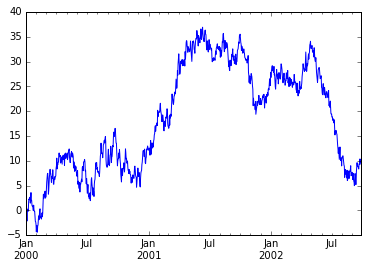

In [130]:
ts.plot()

On DataFrame, plot() is a convenience to plot all of the columns with labels:

In [131]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [132]:
df = df.cumsum()

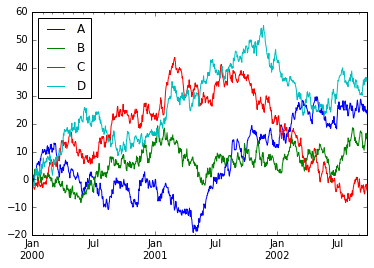

In [133]:
plt.figure(); df.plot(); plt.legend(loc='best')

## Getting Data In/Out

### CSV
[Writing to a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

In [134]:
df.to_csv('foo.csv')

[Reading from a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)

In [135]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.067377,-0.035638,-0.021100,-0.752226
1,2000-01-02,-0.341526,0.867899,0.147792,-2.190171
2,2000-01-03,-0.118822,1.501776,-0.472641,-1.448117
3,2000-01-04,-0.727838,0.889072,-2.704155,-2.934499
4,2000-01-05,0.531075,1.073829,-2.847804,-2.517378
5,2000-01-06,0.091479,1.478376,-3.029743,-0.906359
6,2000-01-07,1.492265,2.113159,-3.549888,-2.117010
7,2000-01-08,1.851265,2.703705,-3.141079,0.079449
8,2000-01-09,2.213547,3.685811,-3.029953,1.620792
9,2000-01-10,2.028055,2.034899,-2.115068,3.566303


### HDF5
Reading and writing to [HDFStores](http://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)

Writing to a HDF5 Store

In [136]:
df.to_hdf('foo.h5','df')

Reading from a HDF5 Store

In [137]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,-0.067377,-0.035638,-0.021100,-0.752226
2000-01-02,-0.341526,0.867899,0.147792,-2.190171
2000-01-03,-0.118822,1.501776,-0.472641,-1.448117
2000-01-04,-0.727838,0.889072,-2.704155,-2.934499
2000-01-05,0.531075,1.073829,-2.847804,-2.517378
2000-01-06,0.091479,1.478376,-3.029743,-0.906359
2000-01-07,1.492265,2.113159,-3.549888,-2.117010
2000-01-08,1.851265,2.703705,-3.141079,0.079449
2000-01-09,2.213547,3.685811,-3.029953,1.620792
2000-01-10,2.028055,2.034899,-2.115068,3.566303


### Excel

Reading and writing to [MS Excel](http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel)

Writing to an excel file

In [138]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Reading from an excel file

In [139]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,-0.067377,-0.035638,-0.021100,-0.752226
2000-01-02,-0.341526,0.867899,0.147792,-2.190171
2000-01-03,-0.118822,1.501776,-0.472641,-1.448117
2000-01-04,-0.727838,0.889072,-2.704155,-2.934499
2000-01-05,0.531075,1.073829,-2.847804,-2.517378
2000-01-06,0.091479,1.478376,-3.029743,-0.906359
2000-01-07,1.492265,2.113159,-3.549888,-2.117010
2000-01-08,1.851265,2.703705,-3.141079,0.079449
2000-01-09,2.213547,3.685811,-3.029953,1.620792
2000-01-10,2.028055,2.034899,-2.115068,3.566303


### Gotchas
If you are trying an operation and you see an exception like:

In [140]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

See [Comparisons](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-compare) for an explanation and what to do.

See [Gotchas](http://pandas.pydata.org/pandas-docs/stable/gotchas.html#gotchas) as well.